### Business Risk prediction

**~Deepa Kushwaha**

Measures the riskiness of the customer dropping off. Higher this 'business_risk' coefficient, higher are the chances that customer will abandon using our platform. 
 

#### Understanding the Data

In [303]:
# Loading Packages
import pandas as pd
import numpy as np                      # For mathematical calculations 
import matplotlib.pyplot as plt         # For plotting graphs 
import seaborn as sns                   # For visualizations

import warnings                        # To ignore any warnings
warnings.filterwarnings('ignore')

In [304]:
#Getting the system ready and loading the data

train = pd.read_csv("assignment_train.csv")
test = pd.read_csv("assignment_test.csv")
train.head()

,agent_id,3M_all_min,3M_all_max,3M_all_avg,3M_weekly_all_avg,3M_daily_all_avg,7days_all_gap_days,all_gap_7days_last_vs_previous,30days_all_gap_days,all_gap_30days_last_vs_previous,...,all_gtv_last10days_d1,all_gtv_last10days_d2,all_gtv_last10days_d3,all_gtv_last10days_d4,all_gtv_last10days_d5,all_gtv_last10days_d6,all_gtv_last10days_d7,all_gtv_last10days_d8,all_gtv_last10days_d9,business_risk
0,1,1920.0,18000.0,6640.000000,0.000000,0.000000,0,0.0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.866667
1,2,537256.0,736296.0,641281.000000,207171.666700,27622.888890,1,0.0,1,0.000000,...,31580.0,39835.0,14000.0,7200.0,68900.0,0.0,23000.0,59700.0,73608.0,-0.833333
2,3,79820.0,140612.0,102150.000000,66743.916670,8899.188889,3,1.0,9,3.333333,...,2030.0,14550.0,21969.0,0.0,0.0,2044.0,0.0,0.0,26960.0,-1.266667
3,4,12266.0,12266.0,4088.666667,0.833333,0.111111,6,0.0,29,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,-6.233333
4,5,0.0,0.0,0.000000,0.000000,0.000000,0,0.0,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.233333


In [305]:
""""Let make copy of train and test data so that even if we have to make any changes 
                  in these datasets we would not lose the original datasets."""

train_original=train.copy() 
test_original=test.copy()

In [306]:
train.shape,test.shape

((44616, 94), (21976, 93))

In [307]:
# summary of the train data their is no null values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44616 entries, 0 to 44615
Data columns (total 94 columns):
agent_id                           44616 non-null int64
3M_all_min                         44616 non-null float64
3M_all_max                         44616 non-null float64
3M_all_avg                         44616 non-null float64
3M_weekly_all_avg                  44616 non-null float64
3M_daily_all_avg                   44616 non-null float64
7days_all_gap_days                 44616 non-null int64
all_gap_7days_last_vs_previous     44616 non-null float64
30days_all_gap_days                44616 non-null int64
all_gap_30days_last_vs_previous    44616 non-null float64
mtd_all_gap_days                   44616 non-null int64
all_gap_mtd_previous_days          44616 non-null float64
3M_all_gap_avg                     44616 non-null float64
12M_all_gap_avg                    44616 non-null float64
all_last_day                       44616 non-null int64
all_last30_stable              

In [308]:
#train.isnull().sum()

In [309]:
train.duplicated().sum()

0

In [310]:
train.nunique().sort_values()    # to check nuniqueness of columns

all_growth_index                       5
7days_all_gap_days                     7
all_last30_inc_count                  22
all_last30_dec_count                  22
all_last30_stable                     25
all_gap_days_d11_20_thisvsprev        29
all_gap_days_d1_10_thisvsprev         29
all_gap_days_d20_31_thisvsprev        30
all_norm_growth_m4                    30
all_gap_7days_last_vs_previous        30
30days_all_gap_days                   30
mtd_all_gap_days                      30
all_norm_growth_m2                    31
all_norm_growth_m5                    31
all_norm_growth_m6                    31
all_norm_growth_m1                    32
all_norm_growth_m3                    32
all_seg                               97
all_risk_cm                           98
avg_all_gap_days_d1_10               108
avg_all_gap_days_d11_20              109
avg_all_gap_days_d21_30              118
all_highest_seg_last6M               118
3M_all_gap_avg                       121
all_norm_growth_

### Exploratory Data Analysis (EDA)

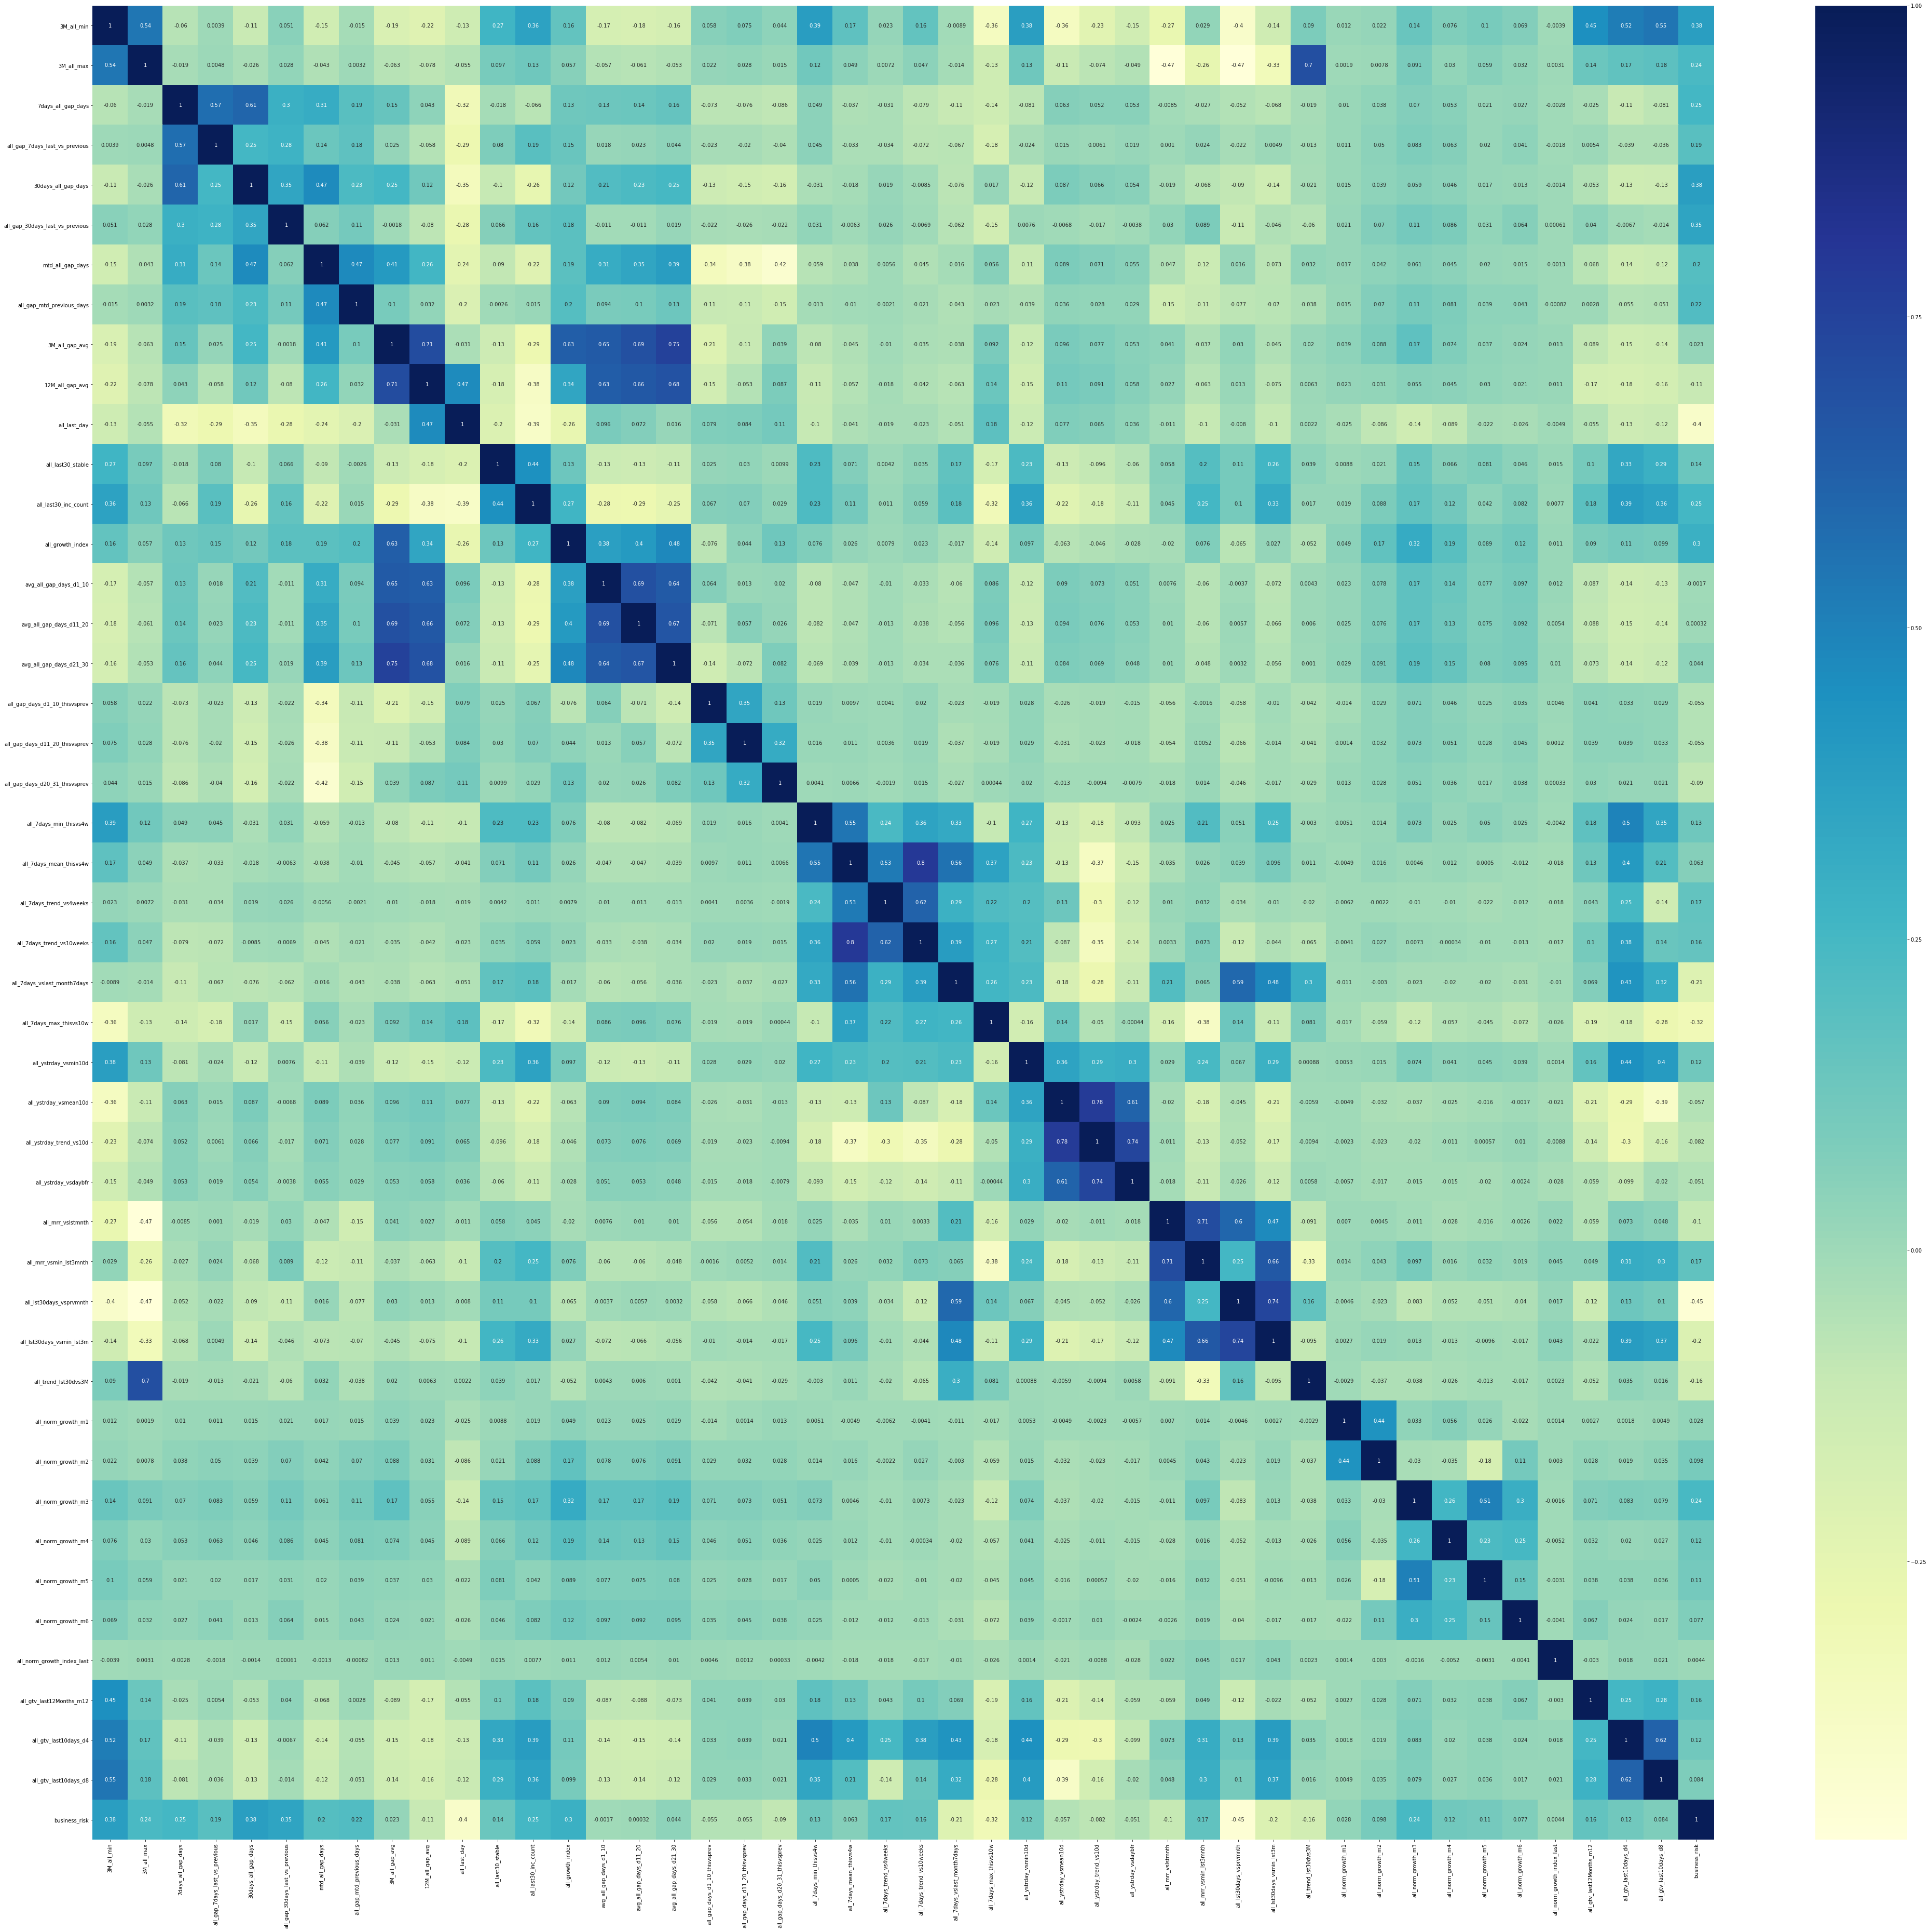

In [356]:
#Let's see the correlation matrix 

#figure size
plt.figure(figsize=(70,65))

sns.heatmap(train.corr(), cmap="YlGnBu", annot= True)
plt.show()

In [312]:
cor = train.corr()
cor.head()

,agent_id,3M_all_min,3M_all_max,3M_all_avg,3M_weekly_all_avg,3M_daily_all_avg,7days_all_gap_days,all_gap_7days_last_vs_previous,30days_all_gap_days,all_gap_30days_last_vs_previous,...,all_gtv_last10days_d1,all_gtv_last10days_d2,all_gtv_last10days_d3,all_gtv_last10days_d4,all_gtv_last10days_d5,all_gtv_last10days_d6,all_gtv_last10days_d7,all_gtv_last10days_d8,all_gtv_last10days_d9,business_risk
agent_id,1.000000,0.001070,-0.006720,-0.005801,-0.002834,-0.002834,-0.005271,0.004136,-0.005903,-0.005882,...,-0.003289,-0.005724,-0.005470,-0.002804,-0.002525,-0.003760,-0.003405,-0.000685,-0.001753,-0.003167
3M_all_min,0.001070,1.000000,0.543727,0.605602,0.808268,0.808268,-0.060473,0.003903,-0.112727,0.051402,...,0.570770,0.612753,0.630011,0.522157,0.654986,0.657772,0.578871,0.548277,0.645988,0.381086
3M_all_max,-0.006720,0.543727,1.000000,0.993811,0.273460,0.273460,-0.018929,0.004841,-0.026480,0.028394,...,0.187242,0.203023,0.206733,0.170168,0.212150,0.216025,0.189072,0.179805,0.212975,0.238202
3M_all_avg,-0.005801,0.605602,0.993811,1.000000,0.324984,0.324984,-0.024402,0.003438,-0.035834,0.028581,...,0.228091,0.245553,0.249307,0.206736,0.259713,0.263240,0.229433,0.220198,0.259274,0.245858
3M_weekly_all_avg,-0.002834,0.808268,0.273460,0.324984,1.000000,1.000000,-0.074142,0.020632,-0.153633,0.072789,...,0.715509,0.772070,0.790609,0.667938,0.806224,0.812767,0.725930,0.678173,0.805900,0.308174


#### Identify Highly Correlated Features & drop redundent feature using the threshold 0.8

In [313]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
train.drop(to_drop, axis=1, inplace=True)

In [314]:
len(to_drop)

47

In [315]:
train.columns

Index(['agent_id', '3M_all_min', '3M_all_max', '7days_all_gap_days',
       'all_gap_7days_last_vs_previous', '30days_all_gap_days',
       'all_gap_30days_last_vs_previous', 'mtd_all_gap_days',
       'all_gap_mtd_previous_days', '3M_all_gap_avg', '12M_all_gap_avg',
       'all_last_day', 'all_last30_stable', 'all_last30_inc_count',
       'all_growth_index', 'avg_all_gap_days_d1_10', 'avg_all_gap_days_d11_20',
       'avg_all_gap_days_d21_30', 'all_gap_days_d1_10_thisvsprev',
       'all_gap_days_d11_20_thisvsprev', 'all_gap_days_d20_31_thisvsprev',
       'all_7days_min_thisvs4w', 'all_7days_mean_thisvs4w',
       'all_7days_trend_vs4weeks', 'all_7days_trend_vs10weeks',
       'all_7days_vslast_month7days', 'all_7days_max_thisvs10w',
       'all_ystrday_vsmin10d', 'all_ystrday_vsmean10d',
       'all_ystrday_trend_vs10d', 'all_ystrday_vsdaybfr', 'all_mrr_vslstmnth',
       'all_mrr_vsmin_lst3mnth', 'all_lst30days_vsprvmnth',
       'all_lst30days_vsmin_lst3m', 'all_trend_lst30dvs3M'

In [316]:
feature_difference = set(test)- set(train)
feature_difference

{'3M_all_avg',
 '3M_daily_all_avg',
 '3M_weekly_all_avg',
 'all_7days_vslast7days',
 'all_consistency_index',
 'all_gtv_last10days_d1',
 'all_gtv_last10days_d2',
 'all_gtv_last10days_d3',
 'all_gtv_last10days_d5',
 'all_gtv_last10days_d6',
 'all_gtv_last10days_d7',
 'all_gtv_last10days_d9',
 'all_gtv_last10weeks_w1',
 'all_gtv_last10weeks_w10',
 'all_gtv_last10weeks_w2',
 'all_gtv_last10weeks_w3',
 'all_gtv_last10weeks_w4',
 'all_gtv_last10weeks_w5',
 'all_gtv_last10weeks_w6',
 'all_gtv_last10weeks_w7',
 'all_gtv_last10weeks_w8',
 'all_gtv_last10weeks_w9',
 'all_gtv_last12Months_m1',
 'all_gtv_last12Months_m10',
 'all_gtv_last12Months_m11',
 'all_gtv_last12Months_m2',
 'all_gtv_last12Months_m3',
 'all_gtv_last12Months_m4',
 'all_gtv_last12Months_m5',
 'all_gtv_last12Months_m6',
 'all_gtv_last12Months_m7',
 'all_gtv_last12Months_m8',
 'all_gtv_last12Months_m9',
 'all_highest_seg_last6M',
 'all_last30_dec_count',
 'all_lst30days_vsmax_lst3m',
 'all_lst30days_vsmean_lst3m',
 'all_mrr_tren

In [317]:
df=list(feature_difference)

In [318]:
test= test.drop(df,axis=1) #same apply in test data

In [319]:
test.head()

,agent_id,3M_all_min,3M_all_max,7days_all_gap_days,all_gap_7days_last_vs_previous,30days_all_gap_days,all_gap_30days_last_vs_previous,mtd_all_gap_days,all_gap_mtd_previous_days,3M_all_gap_avg,...,all_norm_growth_m1,all_norm_growth_m2,all_norm_growth_m3,all_norm_growth_m4,all_norm_growth_m5,all_norm_growth_m6,all_norm_growth_index_last,all_gtv_last12Months_m12,all_gtv_last10days_d4,all_gtv_last10days_d8
0,100001,451709.0,787127.0,0,0.0,0,1.000000,0,0.000000,1.666667,...,0.092477,0.026169,0.210534,0.045777,0.114287,0.017827,0,0.0,9602.0,24521.0
1,100002,0.0,0.0,0,0.0,0,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0.0
2,100003,0.0,0.0,0,0.0,0,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.114287,0.017827,0,0.0,0.0,0.0
3,100004,158032.0,292313.0,3,4.0,4,1.666667,1,0.166667,4.666667,...,-0.356535,-0.060357,0.120184,-0.049946,-0.072307,0.005081,-1,3530.0,3040.0,8287.0
4,100005,17507.0,25728.0,1,2.0,6,1.000000,1,0.250000,7.666667,...,0.088009,0.103134,0.331168,0.086953,0.032750,0.004803,-1,30731.0,756.0,567.0


In [320]:
test.shape,train.shape

((21976, 46), (44616, 47))

In [321]:
train.columns

Index(['agent_id', '3M_all_min', '3M_all_max', '7days_all_gap_days',
       'all_gap_7days_last_vs_previous', '30days_all_gap_days',
       'all_gap_30days_last_vs_previous', 'mtd_all_gap_days',
       'all_gap_mtd_previous_days', '3M_all_gap_avg', '12M_all_gap_avg',
       'all_last_day', 'all_last30_stable', 'all_last30_inc_count',
       'all_growth_index', 'avg_all_gap_days_d1_10', 'avg_all_gap_days_d11_20',
       'avg_all_gap_days_d21_30', 'all_gap_days_d1_10_thisvsprev',
       'all_gap_days_d11_20_thisvsprev', 'all_gap_days_d20_31_thisvsprev',
       'all_7days_min_thisvs4w', 'all_7days_mean_thisvs4w',
       'all_7days_trend_vs4weeks', 'all_7days_trend_vs10weeks',
       'all_7days_vslast_month7days', 'all_7days_max_thisvs10w',
       'all_ystrday_vsmin10d', 'all_ystrday_vsmean10d',
       'all_ystrday_trend_vs10d', 'all_ystrday_vsdaybfr', 'all_mrr_vslstmnth',
       'all_mrr_vsmin_lst3mnth', 'all_lst30days_vsprvmnth',
       'all_lst30days_vsmin_lst3m', 'all_trend_lst30dvs3M'

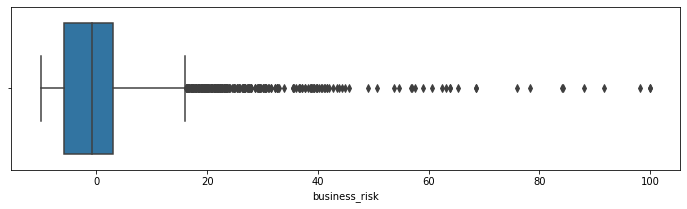

In [325]:
# univariate analisis
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='business_risk', data=train)

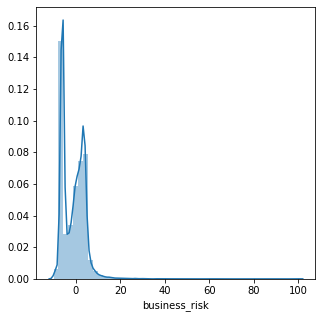

In [326]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(train.business_risk, ax=ax)

In [ ]:
list_col=list(['3M_all_min', '3M_all_max', '7days_all_gap_days',
       'all_gap_7days_last_vs_previous', '30days_all_gap_days',
       'all_gap_30days_last_vs_previous', 'mtd_all_gap_days',
       'all_gap_mtd_previous_days', '3M_all_gap_avg', '12M_all_gap_avg',
       'all_last_day', 'all_last30_stable', 'all_last30_inc_count',
       'all_growth_index', 'avg_all_gap_days_d1_10', 'avg_all_gap_days_d11_20',
       'avg_all_gap_days_d21_30', 'all_gap_days_d1_10_thisvsprev',
       'all_gap_days_d11_20_thisvsprev', 'all_gap_days_d20_31_thisvsprev',
       'all_7days_min_thisvs4w', 'all_7days_mean_thisvs4w',
       'all_7days_trend_vs4weeks', 'all_7days_trend_vs10weeks',
       'all_7days_vslast_month7days', 'all_7days_max_thisvs10w',
       'all_ystrday_vsmin10d', 'all_ystrday_vsmean10d',
       'all_ystrday_trend_vs10d', 'all_ystrday_vsdaybfr', 'all_mrr_vslstmnth',
       'all_mrr_vsmin_lst3mnth', 'all_lst30days_vsprvmnth',
       'all_lst30days_vsmin_lst3m', 'all_trend_lst30dvs3M',
       'all_norm_growth_m1', 'all_norm_growth_m2', 'all_norm_growth_m3',
       'all_norm_growth_m4', 'all_norm_growth_m5', 'all_norm_growth_m6',
       'all_norm_growth_index_last', 'all_gtv_last12Months_m12',
       'all_gtv_last10days_d4', 'all_gtv_last10days_d8'])

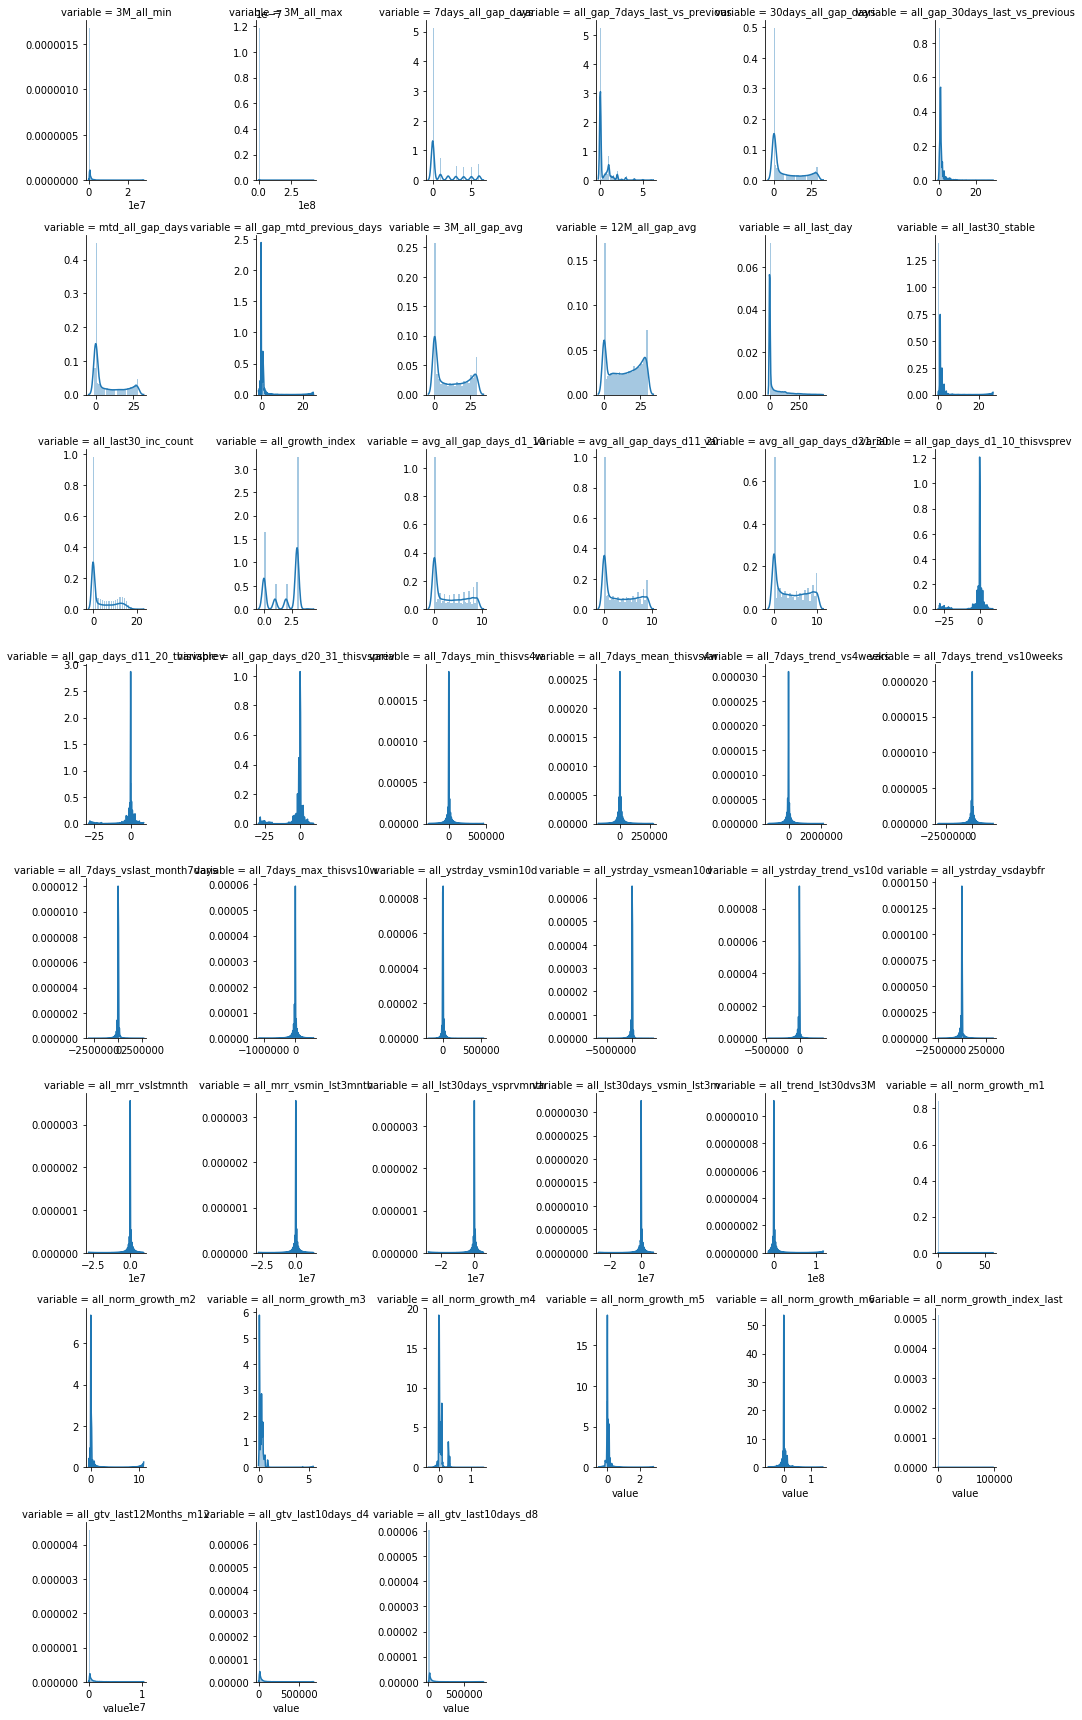

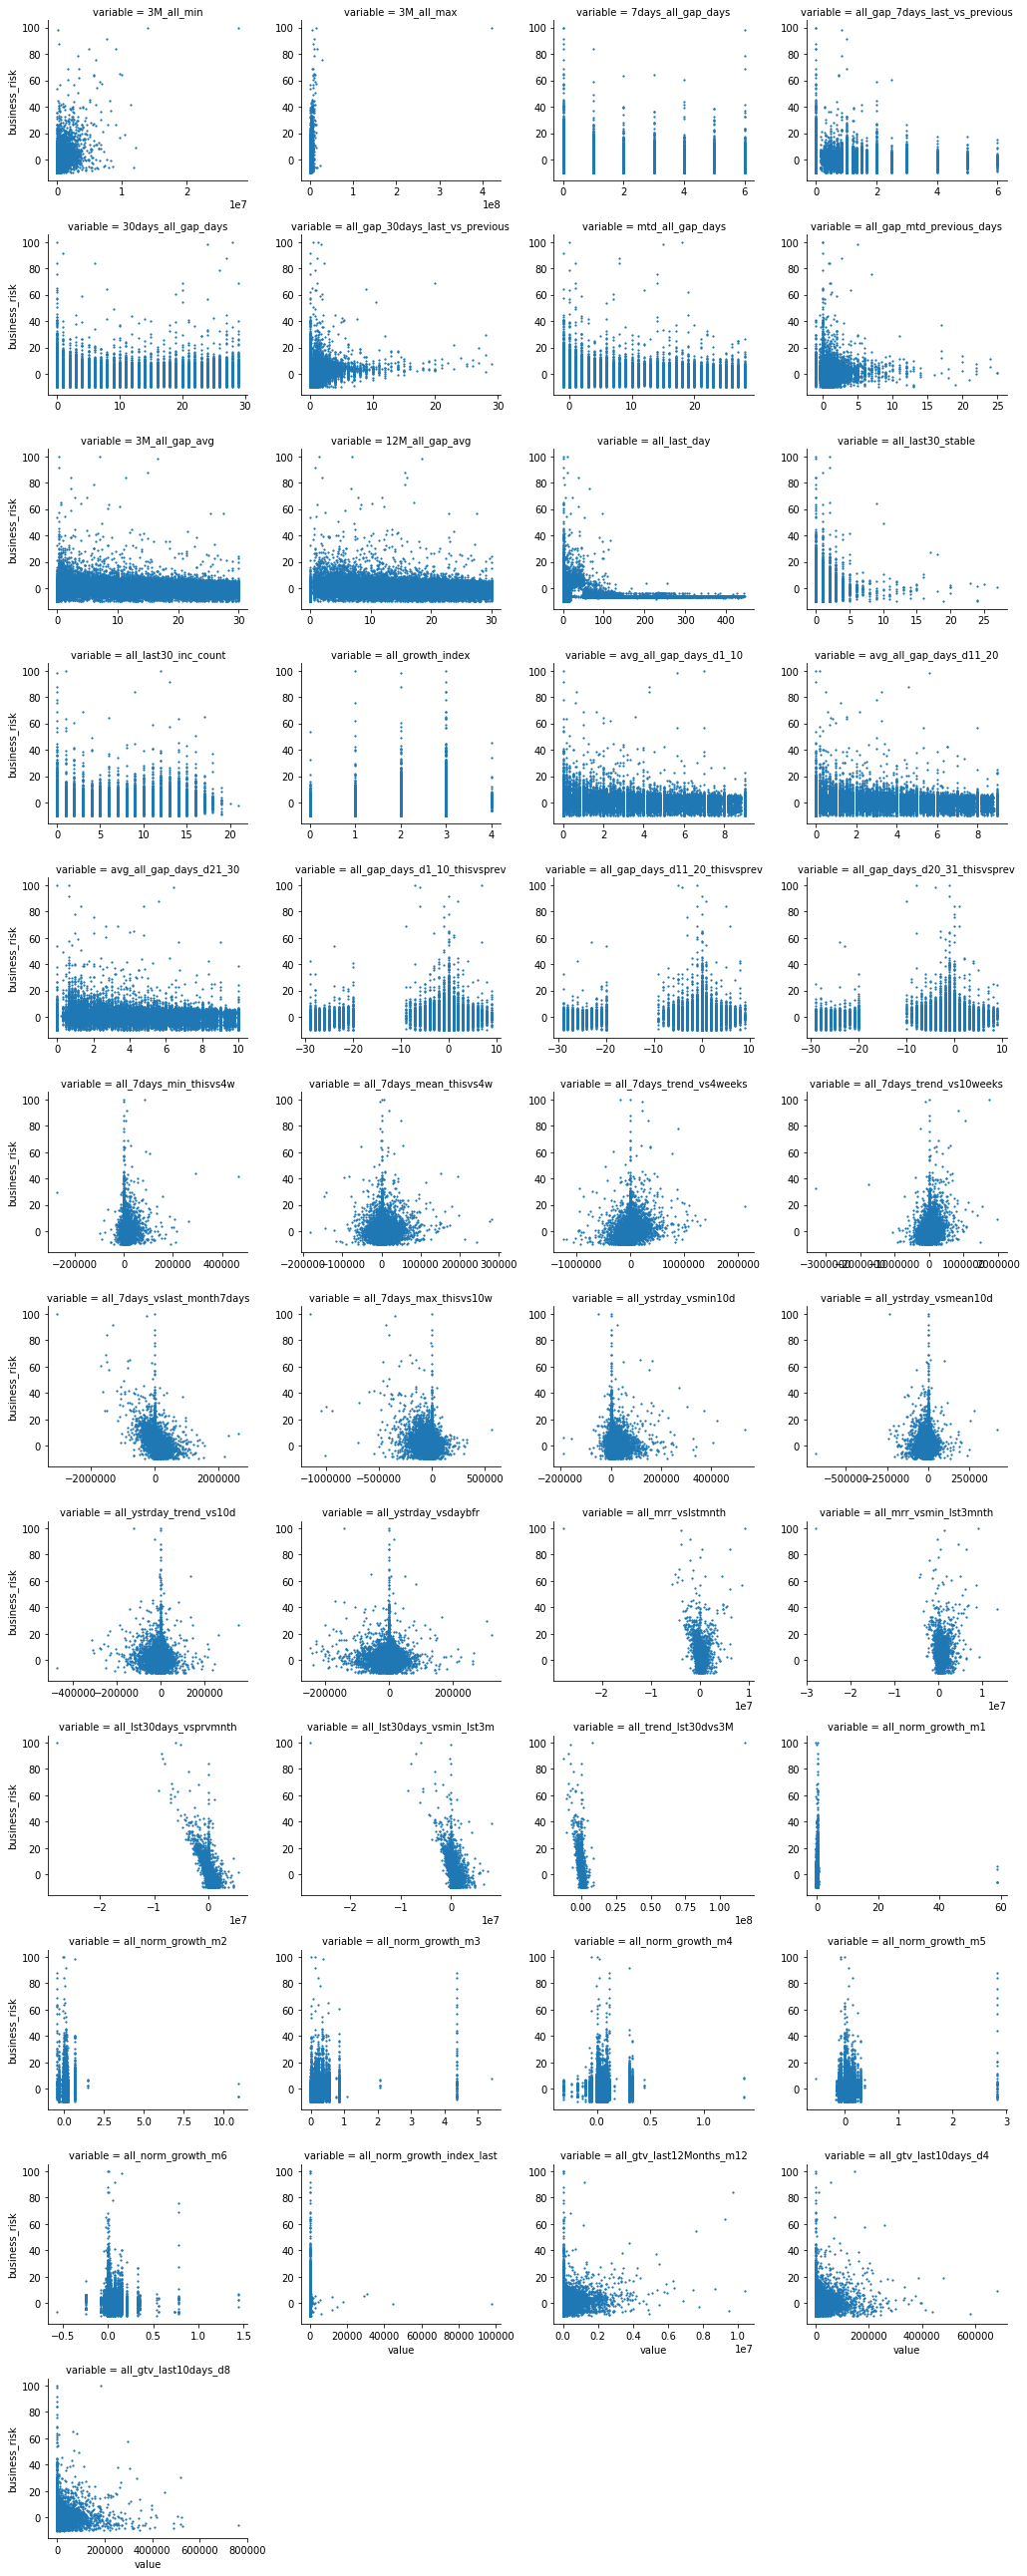

In [324]:
# Bivariate analisis(visualize the distribution)

temp = pd.melt(train.drop('business_risk',axis=1), value_vars=list_col)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=6 , size=3.0, 
                     aspect=0.8,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

# scatter plots
temp = pd.melt(train, id_vars=['business_risk'],value_vars=list_col)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=4 , size=3.0, 
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'business_risk',s=1.5)
plt.show()

### Data Preparation

In [327]:
#Lets drop the agent_id variable as it do not have any effect on the Business_risk.
train= train.drop("agent_id", axis=1)
test=  test.drop("agent_id", axis=1)

**Outlier treatment**

As we saw earlier in univariate analysis& bivariate analysis,data contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

The box plot uses inter-quartile range to detect outliers. Here, we first determine the quartiles Q1 and Q3.

**Interquartile range is given by, IQR = Q3 — Q1**

- Upper limit = Q3+1.5*IQR

- Lower limit = Q1–1.5*IQR

Anything below the lower limit and above the upper limit is considered an outlier

In [328]:
X = train

In [329]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3M_all_min                          82116.250000
3M_all_max                         229855.250000
7days_all_gap_days                      2.000000
all_gap_7days_last_vs_previous          0.857143
30days_all_gap_days                    16.000000
all_gap_30days_last_vs_previous         1.066667
mtd_all_gap_days                       16.000000
all_gap_mtd_previous_days               0.931034
3M_all_gap_avg                         22.666667
12M_all_gap_avg                        19.916667
all_last_day                           41.000000
all_last30_stable                       0.000000
all_last30_inc_count                    9.000000
all_growth_index                        3.000000
avg_all_gap_days_d1_10                  6.000000
avg_all_gap_days_d11_20                 6.166667
avg_all_gap_days_d21_30                 7.000000
all_gap_days_d1_10_thisvsprev           1.000000
all_gap_days_d11_20_thisvsprev          0.000000
all_gap_days_d20_31_thisvsprev          1.000000
all_7days_min_thisvs

In [330]:
X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
X.shape

(6083, 46)

In [331]:
X.head()

,3M_all_min,3M_all_max,7days_all_gap_days,all_gap_7days_last_vs_previous,30days_all_gap_days,all_gap_30days_last_vs_previous,mtd_all_gap_days,all_gap_mtd_previous_days,3M_all_gap_avg,12M_all_gap_avg,...,all_norm_growth_m2,all_norm_growth_m3,all_norm_growth_m4,all_norm_growth_m5,all_norm_growth_m6,all_norm_growth_index_last,all_gtv_last12Months_m12,all_gtv_last10days_d4,all_gtv_last10days_d8,business_risk
22,0.0,0.0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-6.233333
23,0.0,0.0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-6.233333
32,0.0,0.0,0,0.000000,0,0.000000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,-6.233333
49,0.0,0.0,3,1.000000,11,0.444444,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,149.0,149.0,-1.833333
52,0.0,0.0,4,0.571429,27,0.900000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,100.0,0.0,-5.866667


In [332]:
#drop our target variable from the train dataset and save it in another dataset.

X1 = X.drop('business_risk',axis=1) 
y = X.business_risk

In [333]:
# Applying MinMaxScaler to the original numeric variables

from sklearn.preprocessing import MinMaxScaler
#ss = StandardScaler()
mm = MinMaxScaler()
X = mm.fit_transform(X1)

#### train_test_split function from sklearn to divide our train dataset into training and validation part.

In [334]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X1,y, test_size =0.2, random_state = 99)

## Model Building

In [335]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [336]:
#fit the LinearRegression model
lm = LinearRegression()
lm.fit(x_train, y_train)

# Running RFE with the output number of the variable equal to 10
# rfe = RFE(lm, 10)                  
# rfe = rfe.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [337]:
y_pred = lm.predict(x_cv)

In [338]:
from sklearn.metrics import r2_score

r2_score(y_train,lm.predict(x_train))

0.5019257194805856

our model performance too bad lets try another

In [339]:
r2_score(y_pred,y_cv)

-0.01919057637807109

so predictions are bad too

**Ridge & Lasso**

In [340]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [341]:
rid = Ridge()
las = Lasso()

rid.fit(x_train, y_train)
las.fit(x_train, y_train)

y_pred_1 = rid.predict(x_cv)
y_pred_2 = las.predict(x_cv)

In [342]:
r2_score(y_train,rid.predict(x_train))

0.5016498427942454

In [343]:
r2_score(y_pred_1,y_cv)

-0.02529590921907432

In [344]:
r2_score(y_train,las.predict(x_train))

0.46406874455216063

In [345]:
r2_score(y_pred_2,y_cv)

-0.2774058842207592

**RandomForestRegressor**

In [346]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_pred_3 = rf.predict(x_cv)


In [347]:
r2_score(y_train,rf.predict(x_train))

0.9693035106521677

Let us calculate how accurate our predictions are by calculating the accuracy.

In [348]:
r2_score(y_pred_3,y_cv)

0.8955578056420431

So our predictions are almost **89%** accurate, i.e. we have identified 89% of the **Business_risk** correctly. its performance is higer then other so let me pick this one & make predictions for the **test dataset**.

In [352]:
pred_test = rf.predict(test)

submission=pd.read_csv("assignment_test.csv")

submission['business_risk']=pred_test 
submission['agent_id']=test_original['agent_id']

#Finally we will convert to .csv format 
pd.DataFrame(submission).to_csv('assignment_test_result.csv')